<a href="https://colab.research.google.com/github/mlvnr/Proyek-Akhir-Mata-Kuliah-Natural-Language-Processing-2025/blob/main/UAS_NLP_MOHAMMAD_MALVIN_RAFI_2215061074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Penyiapan File Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/NLP/data buku berdasarkan class.xlsx'

Memuat dataset, membuat dataframe, dan menentukan kolom yang ingin digunakan

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/NLP/data buku berdasarkan class.xlsx'

df = pd.read_excel(file_path, sheet_name='master -backup', skiprows=1)
df.columns = ['Class', 'Judul_Utama', 'Anak_Judul']
df

,Class,Judul_Utama,Anak_Judul
0,150,Fisika dasar,"listrik-magnet,optika, fisika modern untuk mah..."
1,150,Fisika dasar,"listrik-magnet,optika, fisika modern untuk mah..."
2,150,Fisika dasar,"listrik-magnet,optika, fisika modern untuk mah..."
3,150,Fisika dasar,"listrik-magnet,optika, fisika modern untuk mah..."
4,150,Fisika dasar,"listrik-magnet,optika, fisika modern untuk mah..."
...,...,...,...
161524,550,Ahlulbait & Al- Quran,Warisan Abadi Nabi yang Suci
161525,550,Ahlulbait & Al- Quran,Warisan Abadi Nabi yang Suci
161526,550,Roadmap To GOD,Meniti Kesempurnaan Akhlak dan Kesucian Rohani
161527,550,Roadmap To GOD,Meniti Kesempurnaan Akhlak dan Kesucian Rohani


# Pre-processing data

Mengubah 'nan' menjadi string kosong, lowering teks, merubah kelas, dan mengecek kolom null

In [ ]:
# Mengisi nilai kosong dengan string kosong ' '
df['Judul_Utama'] = df['Judul_Utama'].fillna('')
df['Anak_Judul'] = df['Anak_Judul'].fillna('')

# Penggabungan Kolom Judul_Utama dan Anak_Judul
df['Teks'] = (df['Judul_Utama'].str.lower() + ' ' +
              df['Anak_Judul'].str.lower())

# Mengubah kelas menjadi 1 digit
df['Label'] = df['Class'] // 100

df = df[['Teks', 'Label']]
df.isnull().sum()

,0
Teks,2
Label,0


Menghapus nilai null

In [ ]:
# Cek jumlah data sebelum penghapusan
print("Jumlah nilai null:")
print(df.isnull().sum())
print(f"Jumlah total baris sebelum penghapusan: {len(df)}")
# Hapus baris null di kolom 'Teks'
df.dropna(subset=['Teks'], inplace=True)

# Tampilkan hasil setelah penghapusan
print(f"Jumlah total baris setelah penghapusan: {len(df)}")
print("Jumlah nilai null:")
print(df.isnull().sum())

Jumlah nilai null:
Teks     2
Label    0
dtype: int64
Jumlah total baris sebelum penghapusan: 161529
Jumlah total baris setelah penghapusan: 161527
Jumlah nilai null:
Teks     0
Label    0
dtype: int64


/tmp/ipython-input-12-1519757543.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Teks'], inplace=True)


Data cleaning

In [ ]:
import re

# Pembersihan sederhana
def bersihkan(teks):
    teks = teks.lower()
    teks = re.sub(r'[^a-z\s]', '', teks)
    teks = teks.strip()
    # Mengganti spasi ganda atau lebih dengan satu spasi
    teks = re.sub(r'\s+', ' ', teks)
    return teks

df['Judul'] = df['Teks'].apply(bersihkan)

/tmp/ipython-input-13-1313298253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Judul'] = df['Teks'].apply(bersihkan)


Menentukan dataset final

In [ ]:
df_fix = df[['Judul','Label']]
df_fix

,Judul,Label
0,fisika dasar listrikmagnetoptika fisika modern...,1
1,fisika dasar listrikmagnetoptika fisika modern...,1
2,fisika dasar listrikmagnetoptika fisika modern...,1
3,fisika dasar listrikmagnetoptika fisika modern...,1
4,fisika dasar listrikmagnetoptika fisika modern...,1
...,...,...
161524,ahlulbait al quran warisan abadi nabi yang suci,5
161525,ahlulbait al quran warisan abadi nabi yang suci,5
161526,roadmap to god meniti kesempurnaan akhlak dan ...,5
161527,roadmap to god meniti kesempurnaan akhlak dan ...,5


In [ ]:
!pip install nltk
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.7 MB/s eta 0:00:00


# PRE-PROCESSING LANJUTAN : MENGHAPUS STOPWORDS DAN STEMMING

In [ ]:
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import pandas as pd

# Download dan siapkan daftar stopwords Bahasa Indonesia
try:
    stopwords.words('indonesian')
except:
    nltk.download('stopwords')

stop_words = set(stopwords.words('indonesian'))

# Fungsi untuk menghapus stopwords
def hapus_stopwords(teks):
    tokens = teks.split()
    tokens_bersih = [kata for kata in tokens if kata not in stop_words]
    return ' '.join(tokens_bersih)

# 3. Buat factory dan stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# 4. Buat fungsi untuk stemming
def stem_teks(teks):
    return stemmer.stem(teks)

# Pengaplikasian ke dataset df_fix

print("Memulai proses preprocessing lanjutan")

# Penghapusan stopwords pada kolom 'Judul'
print("Menghapus stopwords...")
df_fix['Judul_bersih'] = df_fix['Judul'].apply(hapus_stopwords)

# Penerapan stemming pada kolom yang sudah bersih dari stopwords
print("Melakukan stemming...")
df_fix['Judul_stemmed'] = df_fix['Judul_bersih'].apply(stem_teks)

print("Proses preprocessing selesai.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Memulai proses preprocessing lanjutan
Menghapus stopwords...
Melakukan stemming...
Proses preprocessing selesai.


In [ ]:
df_fix['Label'].unique()

array([1, 3, 4, 6, 7, 9, 0, 2, 5, 8])

Splitting data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df_fix['Judul_stemmed']
y = df_fix['Label']

# Membagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)  # Mempertimbangkan kata tunggal (unigram, ngram=1) dan pasangan dua kata (bigram, ngram=2)

# Menerapkan vektorisasi pada data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

Tuning dan evaluasi

In [ ]:
# TUNING MENGGUNAKAN GRIDSEARCHCV ---

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Pipeline menggabungkan beberapa langkah (vektorisasi dan klasifikasi) menjadi satu.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(random_state=42, max_iter=2000)), # clf adalah singkatan dari classifier
])

# Tentukan 'kisi-kisi' parameter yang ingin diuji
# Format: 'nama_langkah__nama_parameter'
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Coba unigram saja, dan unigram+bigram
    'tfidf__max_df': [0.95, 1.0],           # Abaikan kata yang muncul di > 95% dokumen
    'tfidf__min_df': [1, 5],                # Abaikan kata yang muncul kurang dari 5 kali
    'clf__C': [0.1, 1, 10],                 # Parameter regularisasi untuk LinearSVC
}

# jalankan GridSearchCV
# cv=3 berarti menggunakan 3-fold cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

print("Memulai proses Grid Search...")
# Gunakan data latih (X_train, y_train)
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("\nParameter terbaik yang ditemukan:")
print(grid_search.best_params_)

print("\nAkurasi cross-validation terbaik:")
print(grid_search.best_score_)
print("-" * 50)

# Evaluasi model terbaik pada data uji
print("Laporan klasifikasi pada data uji menggunakan model terbaik:")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

Memulai proses Grid Search...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Parameter terbaik yang ditemukan:
{'clf__C': 10, 'tfidf__max_df': 0.95, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}

Akurasi cross-validation terbaik:
0.8395462144311864
--------------------------------------------------
Laporan klasifikasi pada data uji menggunakan model terbaik:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3210
           1       0.88      0.86      0.87      3240
           2       0.86      0.87      0.87      3240
           3       0.86      0.86      0.86      3240
           4       0.87      0.86      0.86      3240
           5       0.87      0.88      0.87      3236
           6       0.87      0.85      0.86      3240
           7       0.89      0.89      0.89      3210
           8       0.87      0.89      0.88      3210
           9       0.86      0.87      0.86      3240

    accuracy            

# IMPLEMENTASI PELATIHAN DATA MENGGUNAKAN MODEL DENGAN PARAMETER TERBAIK

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

final_model = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_df=0.95, min_df=1)),
    ('clf', LinearSVC(C=10, random_state=42, max_iter=2000)) # random_state untuk konsistensi
])

print("Memulai pelatihan model final...")
final_model.fit(X_train, y_train)
print("Pelatihan selesai.")
print("-" * 50)

# Evaluasi model final pada data uji.
print("Laporan klasifikasi pada data uji:")
y_pred = final_model.predict(X_test)
print(classification_report(y_test, y_pred))

Memulai pelatihan model final...
Pelatihan selesai.
--------------------------------------------------
Laporan klasifikasi pada data uji:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3210
           1       0.88      0.86      0.87      3240
           2       0.86      0.87      0.87      3240
           3       0.86      0.86      0.86      3240
           4       0.87      0.86      0.86      3240
           5       0.87      0.88      0.87      3236
           6       0.87      0.85      0.86      3240
           7       0.89      0.89      0.89      3210
           8       0.87      0.89      0.88      3210
           9       0.86      0.87      0.86      3240

    accuracy                           0.87     32306
   macro avg       0.87      0.87      0.87     32306
weighted avg       0.87      0.87      0.87     32306



Confusion Matrix

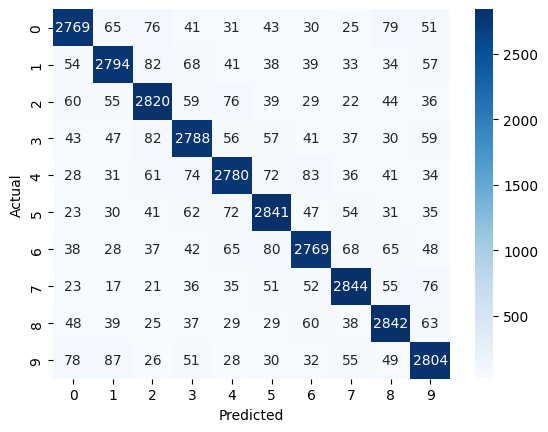

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.show()

Tes pengujian baru

In [ ]:
# --- PENGUJIAN DATA BARU MENGGUNAKAN MODEL TERBAIK DARI GRIDSEARCH ---

judul_buku_baru = [
    "Manajemen Keuangan Negara",
    "Puisi-Puisi Pilihan Chairil Anwar",
    "Panduan Lengkap Jaringan Komputer dan Mikrotik",
    "Gugatan Sederhana dan Praktik Peradilan di Indonesia",
    "Atlas Anatomi Manusia dan Fisiologi Dasar",
    "Perubahan Sentimen pada Politik Indonesia edisi 1"
]

print("Judul Buku Baru untuk Dites:")
for judul in judul_buku_baru:
    print(f"- {judul}")
print("-" * 50)

# Terapkan keseluruhan pipeline preprocessing pada data baru
print("Menerapkan preprocessing pada data baru...")
judul_preprocess_baru = [stem_teks(hapus_stopwords(bersihkan(judul))) for judul in judul_buku_baru]

print("Data baru setelah preprocessing:", judul_preprocess_baru)
print("-" * 50)


# prediksi menggunakan objek grid_search yang sudah dilatih
prediksi_kategori = grid_search.predict(judul_preprocess_baru)

print("\nHasil Prediksi Kategori:")
for judul, kategori in zip(judul_buku_baru, prediksi_kategori):
    print(f"Judul: '{judul}'  ==>  Prediksi Kategori: {kategori}")

Judul Buku Baru untuk Dites:
- Manajemen Keuangan Negara
- Puisi-Puisi Pilihan Chairil Anwar
- Panduan Lengkap Jaringan Komputer dan Mikrotik
- Gugatan Sederhana dan Praktik Peradilan di Indonesia
- Atlas Anatomi Manusia dan Fisiologi Dasar
- Perubahan Sentimen pada Politik Indonesia edisi 1
--------------------------------------------------
Menerapkan preprocessing pada data baru...
Data baru setelah preprocessing: ['manajemen uang negara', 'puisipuisi pilih chairil anwar', 'pandu lengkap jaring komputer mikrotik', 'gugat sederhana praktik adil indonesia', 'atlas anatomi manusia fisiologi dasar', 'ubah sentimen politik indonesia edisi']
--------------------------------------------------

Hasil Prediksi Kategori:
Judul: 'Manajemen Keuangan Negara'  ==>  Prediksi Kategori: 5
Judul: 'Puisi-Puisi Pilihan Chairil Anwar'  ==>  Prediksi Kategori: 6
Judul: 'Panduan Lengkap Jaringan Komputer dan Mikrotik'  ==>  Prediksi Kategori: 0
Judul: 'Gugatan Sederhana dan Praktik Peradilan di Indonesia' 